In [1]:
import os, sys
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt

def get_data_from_file(train_file):
  train_data = []
  # enter your code here (7 points)
  with open(train_file, 'r') as fp:
    lines = fp.readlines()
  for k, line in enumerate(lines):
    print('{:6d} /{:6d}'.format(k+1, len(lines)), end='\r')
    img_path = os.path.join('dogs_and_cats/train',line.strip().split(' ')[0])
    try:
      img = cv2.imread(img_path)
      img_resized = cv2.resize(img, (48, 48))
      if 'cat' in line:
        label = 0
      else:
        label = 1
      train_data.append([img_resized, label])
    except:
      print('read file error:', img_path)
  return train_data

def get_image_and_label(train_data):
  # enter your code here (8 points)
  X_train = np.array([data[0] for data in train_data], dtype=np.uint8).reshape(-1, 48, 48, 3)
  Y_train = np.array([data[1] for data in train_data], dtype=np.uint8).reshape(-1)

  return X_train, Y_train

def assignment4b_1():
  train_file = 'train_list.txt'
  test_file = 'test_list.txt'
  train_data = get_data_from_file(train_file)
  X_train, Y_train = get_image_and_label(train_data)
  print()  
  test_data = get_data_from_file(test_file)
  X_test, Y_test = get_image_and_label(test_data)
  print()
  print(len(train_data))
  print(train_data[0][0].shape)
  print(len(test_data))
  print(test_data[0][0].shape)

  save_path = 'dogs_cats.pkl'
  print('Saving to', save_path)
  data = {}
  data['X_train'] = X_train
  data['Y_train'] = Y_train
  data['X_test'] = X_test
  data['Y_test'] = Y_test
  pickle.dump(data, open(save_path, 'wb'))

def build_model():
  # enter your code here, and remove the following pass (15 points)
  model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(48, 48, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(2, activation='sigmoid')]
  )
  
  return model

def assignment4b_2():
  data = pickle.load(open("dogs_cats.pkl","rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  model = build_model()
  model.summary()
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  ck_dir = "ckpt_dogcat"
  checkpoint_path = ck_dir+"/cp-{epoch:04d}.ckpt"
  cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=10)
  batch_size = 64
  epochs = 60
  # enter your code here (5 points)
  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, callbacks=[cp_callback], validation_split=0.1, shuffle=True)
  test_loss, test_acc = model.evaluate(X_test, Y_test)
  print('Test accuracy:', test_acc)
  pickle.dump(history.history, open('history.pkl', 'wb'))
    
def assignment4b_3():
  # enter your code here, and remove the following pass (5 points)
    history = pickle.load(open("history.pkl", "rb"))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # draw loss history
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()  

    plt.show()
  

def assignment4b_4():
  # enter your code here, and remove the following pass (5 points)
  epochs = [10,20,30,40,50,60]
  accuracies = []

  test_data = get_data_from_file('test_list.txt')
  X_test, Y_test = get_image_and_label(test_data)
  
  for epoch in epochs:
    model = build_model()
    model.load_weights(f'ckpt_dogcat/cp-{epoch:04d}.ckpt')
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    loss, acc = model.evaluate(X_test, Y_test)
    accuracies.append(acc)
    print(f'Test accuracy at epoch {epoch} = {acc}')

  plt.figure(figsize=(10, 5))
  plt.plot(epochs, accuracies, marker='o', linestyle='-')
  plt.title('Test Accuracy at Various Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Test Accuracy')
  plt.grid(True)
  plt.xticks(epochs)
  plt.show()


In [4]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

 20000 / 20000
  5000 /  5000
20000
(48, 48, 3)
5000
(48, 48, 3)
Saving to dogs_cats.pkl


In [2]:
    assignment4b_2() # do not modify this line

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

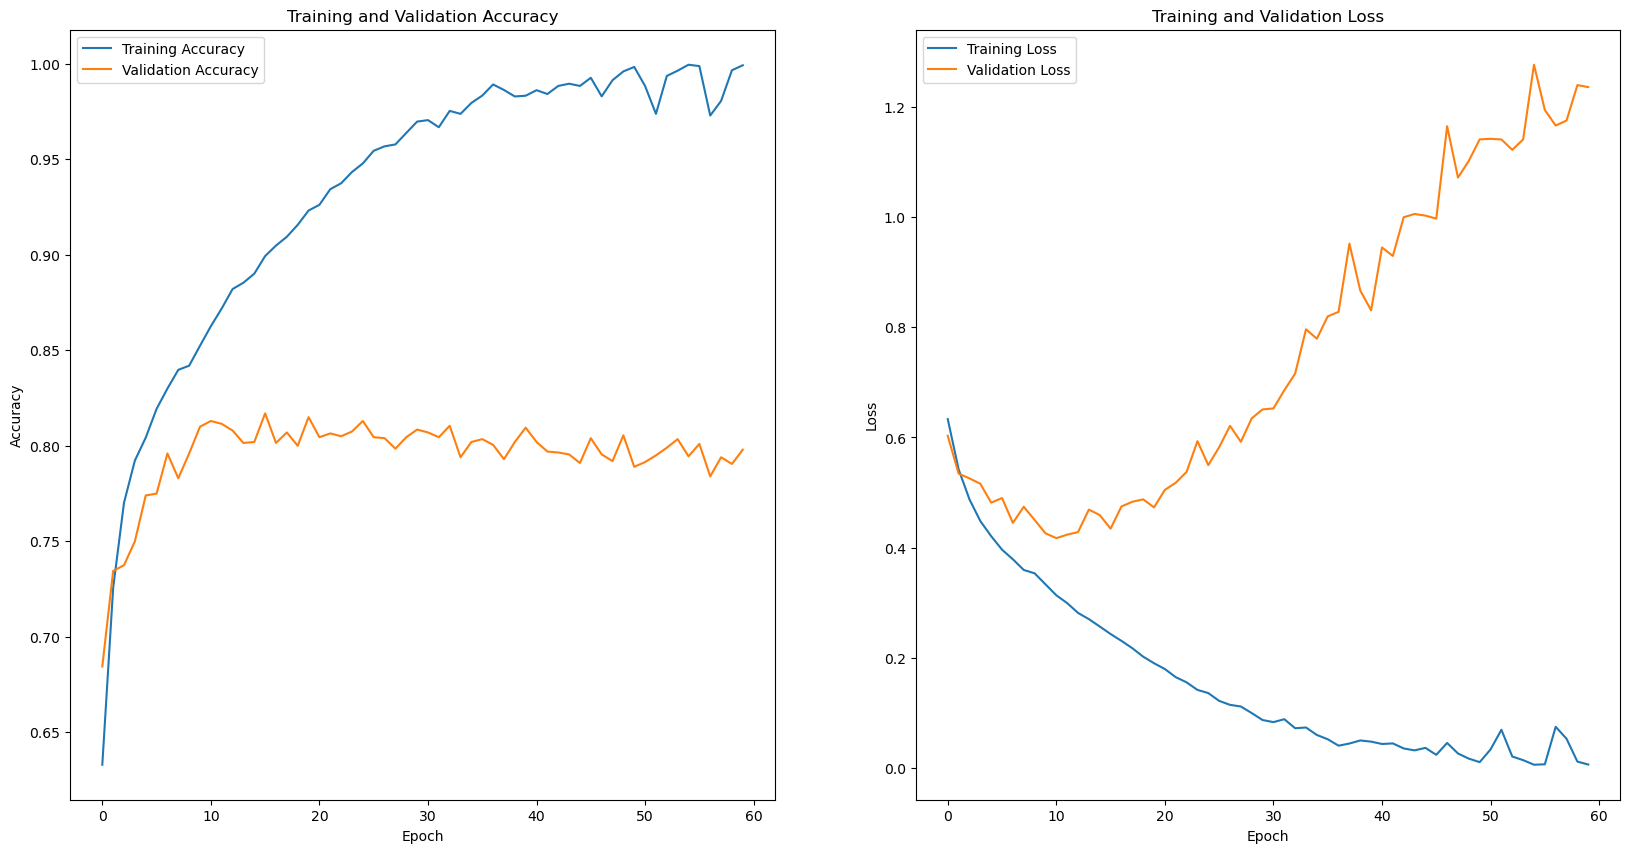

In [6]:
    assignment4b_3() # do not modify this line

157/157 [==============================] - 2s 10ms/step - loss: 0.6980 - accuracy: 0.5050
Test accuracy at epoch 10 = 0.5049999952316284
157/157 [==============================] - 2s 10ms/step - loss: 0.6980 - accuracy: 0.5018
Test accuracy at epoch 20 = 0.501800000667572
157/157 [==============================] - 2s 10ms/step - loss: 0.6906 - accuracy: 0.5254
Test accuracy at epoch 30 = 0.5253999829292297
157/157 [==============================] - 2s 10ms/step - loss: 0.6995 - accuracy: 0.5946
Test accuracy at epoch 40 = 0.5946000218391418
157/157 [==============================] - 2s 10ms/step - loss: 0.8575 - accuracy: 0.6654
Test accuracy at epoch 50 = 0.6654000282287598
157/157 [==============================] - 2s 11ms/step - loss: 0.9413 - accuracy: 0.6828
Test accuracy at epoch 60 = 0.6827999949455261


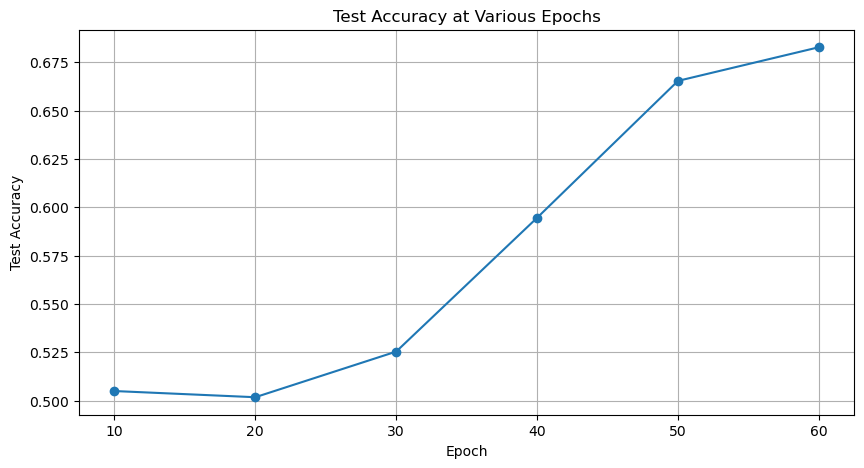

In [2]:
    assignment4b_4() # do not modify this line

In [ ]:
# Question 1 (5 points): If we set shuffle=False during the execution of model.fit() in Assignment 4b-2,
# which was previously set to shuffle=True, what impact will this have on the validation accuracy?
# Write down your answer here.

In [ ]:
# Question 2 (5 points): In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this?
# Write down your answer here.